#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




# **Implementacja metodą brute-force oraz według heurystyki**

In [ ]:
import numpy as np
from itertools import product
from typing import Union


class KnapSack:
    def __init__(self, profits: Union[np.array, list[int]],
                 weights: Union[np.array, list[int]],
                 capacity: int):
        self.profits = profits
        self.weights = weights
        self.capacity = capacity

    def solve_knapsack_brute_force(self) -> dict[str, Union[int, list[int]]]:
        num_of_items = len(self.weights)
        # 1 - item selected, 0 - item not selected
        selected_items_possibilites = list(product(range(2), repeat=num_of_items))

        best_selected_items = None
        best_profit = 0
        best_weight = 0
        for selected_items in selected_items_possibilites:
            selected_items_weight = 0
            selected_items_profit = 0
            for i in range(len(self.weights)):
                if selected_items[i] == 1:
                    selected_items_weight += self.weights[i]
                    selected_items_profit += self.profits[i]
                if selected_items_weight > self.capacity:
                    break

            if selected_items_weight <= self.capacity:
                if selected_items_profit > best_profit:
                    best_profit = selected_items_profit
                    best_weight = selected_items_weight
                    best_selected_items = selected_items

        indexes_of_best_selected_items = [
            i for i, item in enumerate(best_selected_items) if item == 1]

        return {'indexes': indexes_of_best_selected_items,
                'weight': best_weight,
                'profit': best_profit}

    def solve_knapsack_pw_ratio(self) -> dict[str, Union[int, list[int]]]:
        indexes_with_profit_weight_ratios = sorted(
            [(i, self.profits[i] / self.weights[i]) for i in range(
                len(self.weights))], key=lambda x: x[1])[::-1]

        weight = 0
        profit = 0
        selected_items_indexes = []

        for index, _ in indexes_with_profit_weight_ratios:
            if weight + self.weights[index] < self.capacity:
                weight += self.weights[index]
                profit += self.profits[index]
                selected_items_indexes.append(index)

        return {'indexes': sorted(selected_items_indexes),
                'weight': weight,
                'profit': profit}


if __name__ == "__main__":
    weights = np.array([8, 3, 5, 2])
    capacity = 9
    profits = np.array([16, 8, 9, 6])

    kp = KnapSack(profits, weights, 9)
    print("Brute-force: " + str(kp.solve_knapsack_brute_force()))
    print("Heurestic: " + str(kp.solve_knapsack_pw_ratio()))


Brute-force: {'indexes': [1, 2], 'weight': 8, 'profit': 17}
Heurestic: {'indexes': [1, 3], 'weight': 5, 'profit': 14}


# **Wnioski po otrzymanych wynikach z przykładowymi danymi**

### Rozwiązania metodami brute-force oraz według podanej heurystyki dały różniące się rozwiązania.

*   ### Rozwiązanie **metodą brute-force** jest prawidłowe, ponieważ analizowaliśmy każdą możliwość i wybraliśmy takie ułożenie przedmiotów w plecaku, które najlepiej spełniają warunku zadania.
*   ### Rozwiązanie **metodą według podanej heurystyki** jest w miarę dobre, lecz nie najlepsze jakie mogliśmy uzyskać. Wynika to z faktu, że korzystaliśmy z ułatwienia (wkładanie najpierw przedmiotów o największym wartość/waga stosunku), które nam znacznie przyśpieszyło otrzymanie rozwiązania.



# **Kod użyty do utworzenia wykresów**

In [3]:
import matplotlib.pyplot as plt
from matplotlib.container import BarContainer
from typing import Union, List, Optional
import numpy as np
from pathlib import Path


def configurate_plot(x_title: str, y_title: str, title: str,
                     *, window_title: str = "Figure", label_fontsize: int = 12,
                     title_fontsize: int = 14) -> None:
    plt.xlabel(x_title, fontsize=label_fontsize)
    plt.ylabel(y_title, fontsize=label_fontsize)
    plt.title(title, fontsize=title_fontsize)
    plt.style.use("fivethirtyeight")
    plt.grid(True)
    plt.get_current_fig_manager().set_window_title(window_title)


def make_plot(x_values: Union[list, np.array], y_values: Union[list, np.array],
              *, hex_color: str, line_width: int,
              label: Optional[str] = None) -> None:
    plt.plot(x_values,
             y_values,
             label=label, color=hex_color,
             linewidth=line_width)


def show_plot() -> None:
    plt.show()


def save_plot(path: Union[Path, str]) -> None:
    plt.savefig(path)


def clear_after_making_plot() -> None:
    plt.cla()
    plt.style.use('default')


# **Kod użyty do mierzenia czasów wykonania**

In [ ]:
import numpy as np
from random import randint
from typing import Callable, Any
import time
import gc


def get_time(func_name: Callable[[Any], Any], *args) -> float:
    """
    Calculates the execution time of the funciton
    and returns time in seconds
    """
    gc_old = gc.isenabled()
    gc.disable()
    time_start = time.process_time()

    func_name(*args)

    time_stop = time.process_time()
    time_count = time_stop - time_start
    if gc_old:
        gc.enable()
    return time_count


def calc_times_brute_force(max_num_of_elements: int) -> dict[int, float]:
    """
    Calculates correlation between the time of execution
    and the number of elements in arrays with weights and
    profits in algorithm solving knapsack problem with
    brute force

    Returns dictionary:
    {number_of_elements: execution_time_in_sec...}
    """
    result = {}
    weights = np.array([], dtype=int)
    profits = np.array([], dtype=int)
    for i in range(1, max_num_of_elements + 1):
        weights = np.append(weights, [randint(1, 20)])
        profits = np.append(profits, [randint(1, 20)])
        knapsack = KnapSack(profits, weights, randint(10, 50))
        time_in_sec = get_time(knapsack.solve_knapsack_brute_force)
        result[i] = time_in_sec
    return result


# **Wykres dla rozwiązania metodą brute-force**

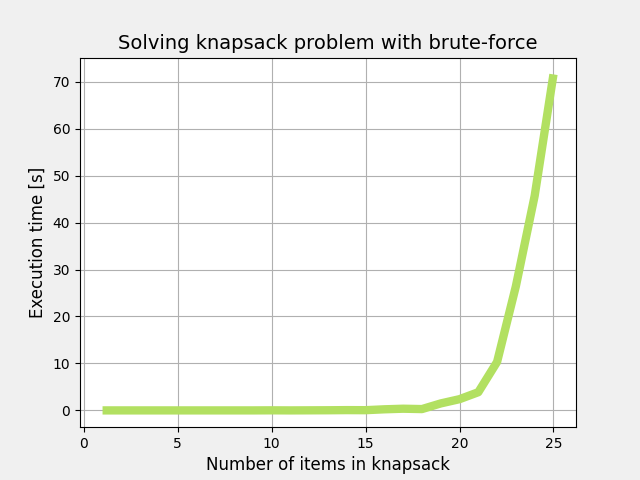

# **Kolejne wnioski**


*   ### **Metoda brute-force** jest dobrym rozwiązanie, gdy mamy bardzo mała ilość przedmiotów do rozpatrzenia. Jego największą wadą jest jego złożoność czasowa. Czas rozwiązania problemu tą metodą rośnie wykładniczo do liczby elementów w plecaku.
*   ###   **Metoda według podanej heurystyki**, choć nie zawsze daje najlepszy możliwy wynik, jest dobrym rozwiązaniem, gdy mamy stosunkowo dużą liczbę przedmiotów do rozpatrzenia. Złożoność czasowa tego rozwiązania to O(nlogn + n)





# **Wykres dla rozwiązania metodą według podanej heurystyki**

### Wykres ten pokazuje ogromną różnicę w czasach działania metody w zależności od liczby elementów w plecaku porównując go do wykresu dla metody brutee-force.

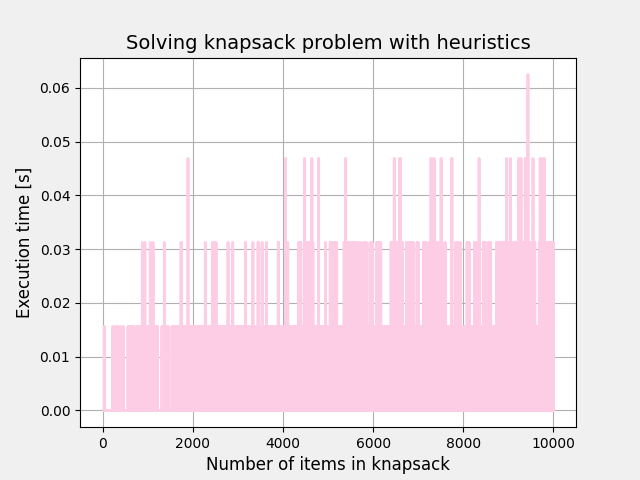